In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
df = pd.read_csv("dataset_phishing.csv")

selected_features = [
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and',
    'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon',
    'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
    'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
    'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix',
    'random_domain', 'shortening_service', 'path_extension', 'phish_hints', 'domain_in_brand',
    'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report',
    'domain_age', 'domain_registration_length', 'whois_registered_domain', 'dns_record'
]

In [19]:
print(df.shape)
df.head()

(11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


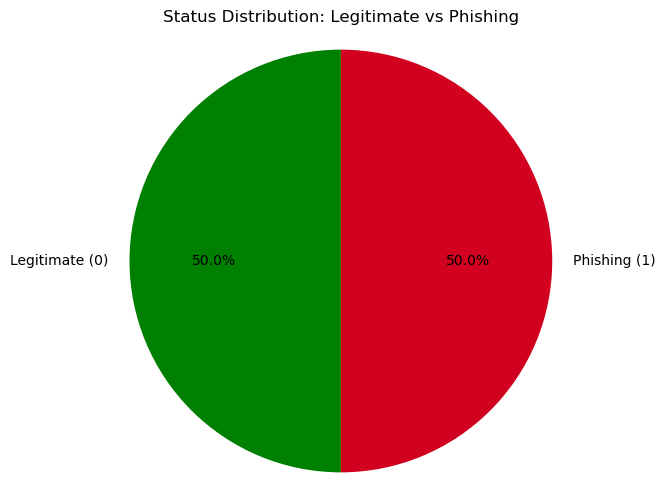

In [20]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=["Legitimate (0)", "Phishing (1)"], autopct='%1.1f%%', colors=['#008000', '#d1011f'], startangle=90)
plt.title("Status Distribution: Legitimate vs Phishing")
plt.axis('equal')  
plt.show()

In [21]:
X = df[selected_features]
y = df['status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
feature_importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
domain_age                    0.144876
nb_www                        0.120042
length_url                    0.084255
domain_registration_length    0.082848
phish_hints                   0.075498
length_hostname               0.068764
ratio_digits_url              0.066310
nb_slash                      0.056412
nb_hyphens                    0.042954
nb_dots                       0.035643
ratio_digits_host             0.035402
ip                            0.018110
nb_subdomains                 0.016918
nb_eq                         0.016083
nb_qm                         0.015705
https_token                   0.014710
domain_in_brand               0.014703
nb_underscore                 0.012976
prefix_suffix                 0.012608
shortening_service            0.008559
random_domain                 0.005627
whois_registered_domain       0.005620
nb_and                        0.005361
nb_com                        0.004915
suspecious_tld                0.004546
stat

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

['legitimate' 'legitimate' 'legitimate' ... 'phishing' 'legitimate'
 'phishing']


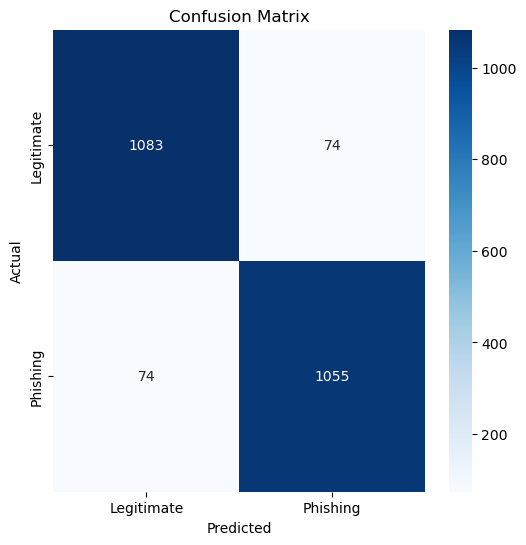

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
performance_metrics = classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"])
print("Performance Metrics (Classification Report):")
print(performance_metrics)

Performance Metrics (Classification Report):
              precision    recall  f1-score   support

  Legitimate       0.94      0.94      0.94      1157
    Phishing       0.93      0.93      0.93      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



In [27]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']